# Background subtraction

In [1]:
import matplotlib.pyplot as plt    # Load matplotlib
import numpy as np
import os

In [2]:
# all edf data is colleced in a folder with the same detector distance
folder_GC = 'merged_GC'
folder_H2O = 'merged_H2O'

folder_merged = folder_GC
# now we load all the files in that folder
files_merged = []
# r=root, d=directories, f = files
for r, d, f in os.walk(folder_merged):
    for file in f:
        if '.dat' in file:
            files_merged.append(os.path.join(file))
# %% LIST NAMES
for ii in range(len(files_merged)):
   print(ii, '|', files_merged[ii])

0 | SilB_30.dat
1 | Plu_5.dat
2 | CTAB50_NaSal15.dat
3 | SilB_10.dat
4 | SilC_0p1.dat
5 | SilB_0p1.dat
6 | SilB_1_1p5mm.dat
7 | SilA_1.dat
8 | SilA_SilB_SilC.dat
9 | GC.dat
10 | SilB_SilC.dat
11 | Plu_10.dat
12 | SilB_20.dat
13 | SilA_SilB_SilC_10.dat
14 | SilB_5.dat
15 | AgBeh.dat
16 | SilC_1.dat
17 | SilA_SilB.dat
18 | SilA_0p1.dat
19 | SilA_SilC.dat
20 | H2O.dat
21 | CTAB50.dat
22 | SilB_1_2mm.dat
23 | SilB_1.dat
24 | Empty.dat
25 | EC.dat


# you can select any file to compare the merging

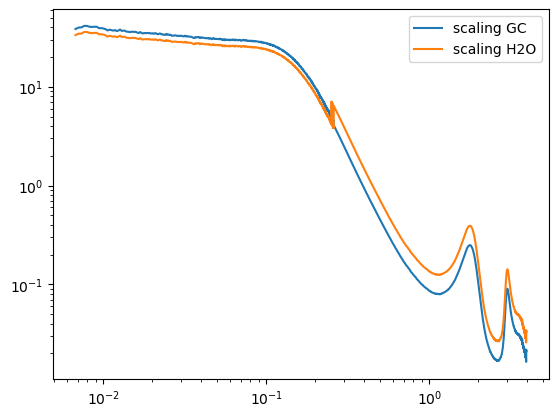

In [3]:
# select the file of interest
plot_select = 9

f_GC = np.loadtxt(folder_GC +'/'+ files_merged[plot_select])
f_H2O = np.loadtxt(folder_H2O +'/'+ files_merged[plot_select])

plt.loglog(f_GC[:,0], f_GC[:,1])
plt.loglog(f_H2O[:,0], f_H2O[:,1])
plt.legend(['scaling GC', 'scaling H2O'])

## Water is best for low intensity calibration
## GC is best  for high intensity calibration

So, let's use water as a calibration file for now

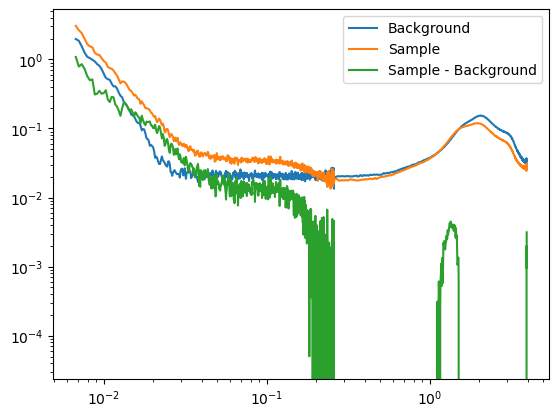

In [4]:
Load_sample = 2
# should be fixed
Load_background = 20 #20

f_s = np.loadtxt(folder_H2O +'/'+ files_merged[Load_sample])
f_b = np.loadtxt(folder_H2O +'/'+ files_merged[Load_background])

plt.loglog(f_b[:,0], f_b[:,1])
plt.loglog(f_s[:,0], f_s[:,1])
plt.loglog(f_s[:,0], f_s[:,1]-f_b[:,1])
plt.legend(['Background', 'Sample', 'Sample - Background'])



## Very often a correction factor is still needed

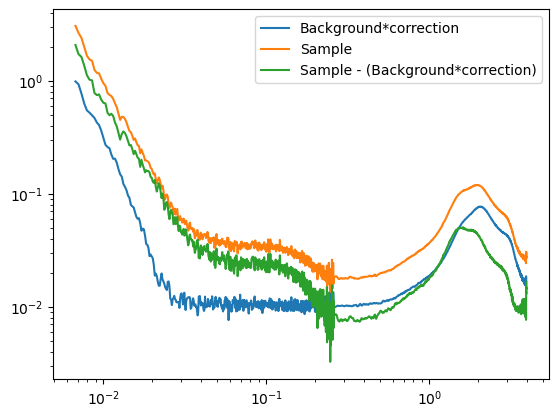

In [5]:
correction_factor = 0.5

plt.loglog(f_b[:,0], f_b[:,1]*correction_factor)
plt.loglog(f_s[:,0], f_s[:,1])
plt.loglog(f_s[:,0], f_s[:,1]-(f_b[:,1]*correction_factor))
plt.legend(['Background*correction', 'Sample',  'Sample - (Background*correction)'])